In [3]:
import zipfile

# Ruta del archivo ZIP
archivo_zip = '/content/pruebas_consenso.zip'
# Directorio donde descomprimir los archivos
directorio_destino = '/content/pruebas_consenso/'

# Abrir el archivo ZIP y extraer el contenido
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)

print("Archivo descomprimido con éxito.")

Archivo descomprimido con éxito.


In [32]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

number = 6
# number = 4

# Hardcoded file paths (modify as needed)
nifti_files = [
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/original.nii',
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/mask.nii',
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/model_axial.nii',
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/model_coronal.nii',
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/model_sagital.nii',
    f'/content/pruebas_consenso/P{number}_T1_FLAIR/model_consenso.nii'
]

titles = ['Original', 'Ground truth', 'Axial', 'Coronal', 'Sagital', 'Consenso']


In [33]:
# Hardcoded slice index (modify as needed)
slice_index = 90  # Change this based on the dataset


# Load NIFTI files and extract the slice
slices = []
for file in nifti_files:
    nii_img = nib.load(file)  # Load NIFTI file
    data = nii_img.get_fdata()  # Extract data as a numpy array
    slice_data = data[:, :, slice_index]  # Extract the specified slice
    slices.append(slice_data)


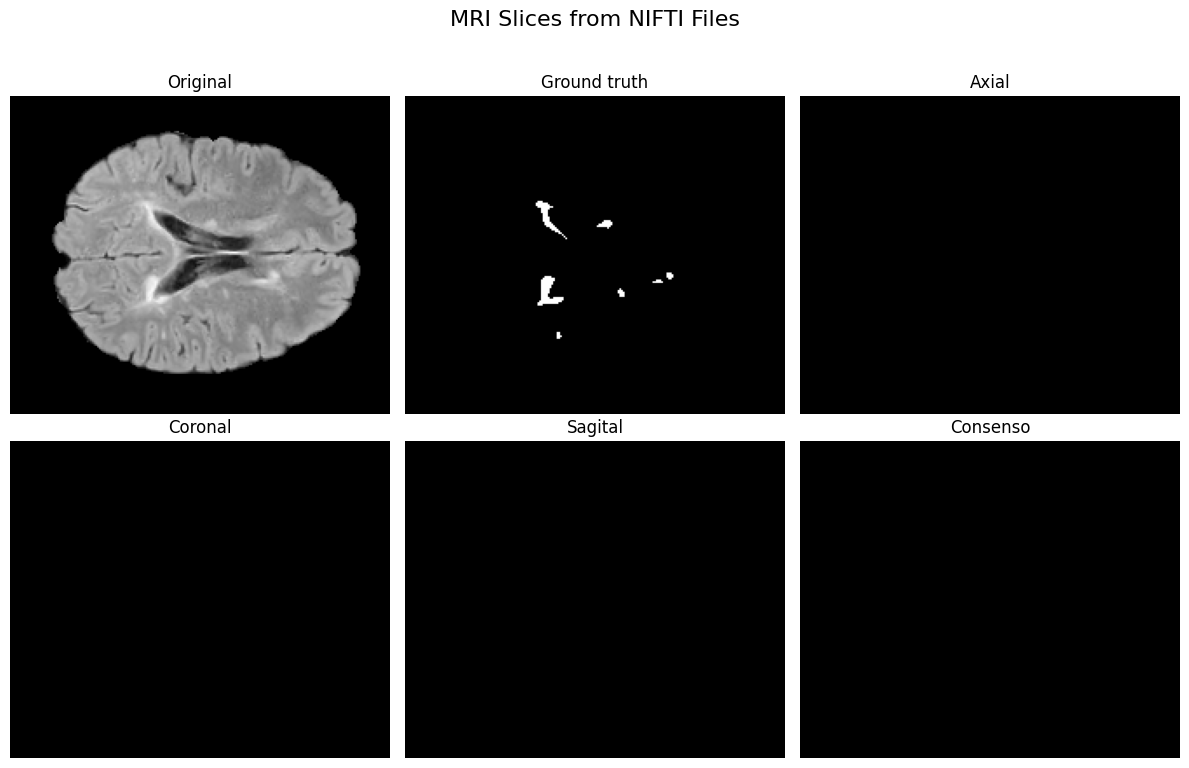

In [34]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("MRI Slices from NIFTI Files", fontsize=16)

# Plot each slice
for i, ax in enumerate(axes.flat):
    ax.imshow(slices[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(f'{titles[i]}')
    ax.axis('off')  # Hide axes

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()

<ipython-input-28-24a4e7887955>:3: RuntimeWarning: invalid value encountered in divide
  rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))  # Normalize to [0, 1]


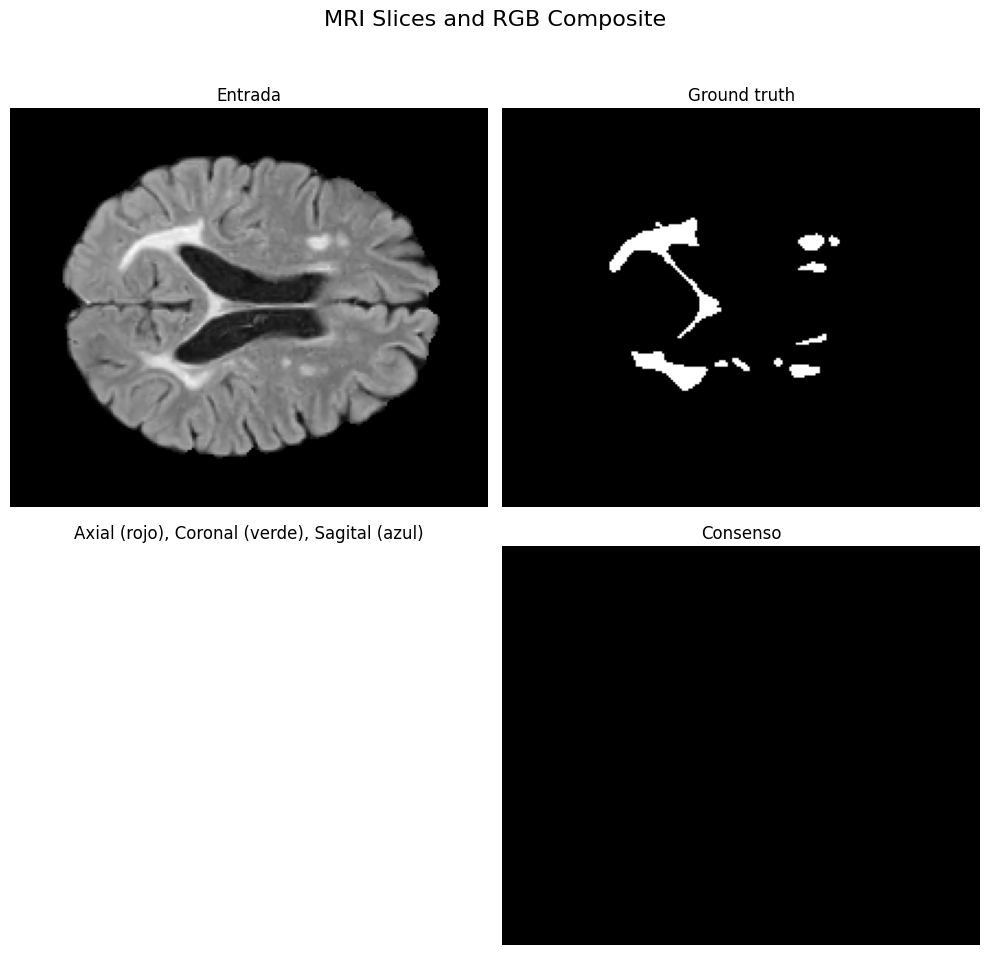

In [28]:
# Create an RGB image from the third, fourth, and fifth files
rgb_image = np.stack((slices[2], slices[3], slices[4]), axis=-1)
rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))  # Normalize to [0, 1]

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("MRI Slices and RGB Composite", fontsize=16)

# Plot the first two slices
axes[0, 0].imshow(slices[0], cmap='gray')
axes[0, 0].set_title('Entrada')
axes[0, 0].axis('off')

axes[0, 1].imshow(slices[1], cmap='gray')
axes[0, 1].set_title('Ground truth')
axes[0, 1].axis('off')

# Plot the RGB composite image
axes[1, 0].imshow(rgb_image)
axes[1, 0].set_title('Axial (rojo), Coronal (verde), Sagital (azul)')
axes[1, 0].axis('off')

# Plot the sixth file slice
axes[1, 1].imshow(slices[5], cmap='gray')
axes[1, 1].set_title('Consenso')
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()
